<a href="https://colab.research.google.com/github/satyalytics/deep_learning/blob/main/Introduction_to_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction To Deep Learning


Deep learning is one of the hottest subject in data science. There is a lot of excitement about deep learning. Applications like color restoration ( adding color to black and white photo ), speech enactment (sync of lip according to the audio in the video), automatic handwritting generation, automatic machine translation (cnn translate the text in an image), automatically adding sounds to a silent movie (best matching sound). 

Deep learning is created to mimic human body. The biological neuron vs artificial neural network is as shown below

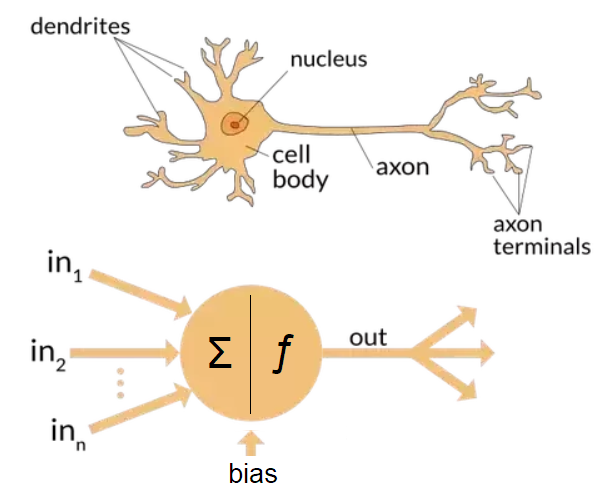

A Number of input neurons are used in the first layer called as input layer. To give outout, required number of neurons are used called as output layer. All of the layers in between them is called as the hidden layers. The number of layer is counted excluding the input layer. Here is the structure:

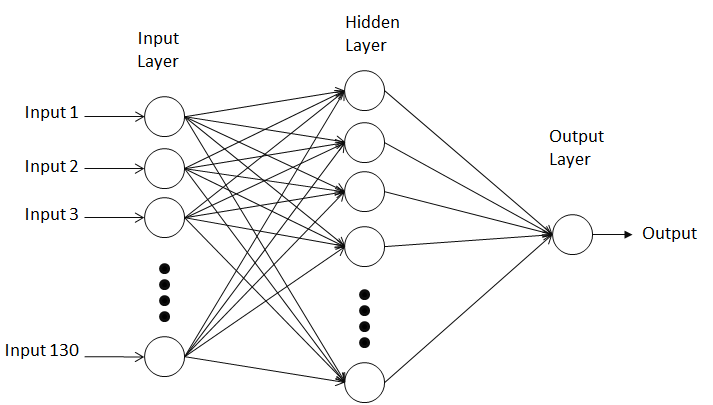

3 main topics of artificial neural network is: Forward propagation, back propagation, activation function.

# Forward Propagation

> The process in which the data flows from the input layer to the output layer. 

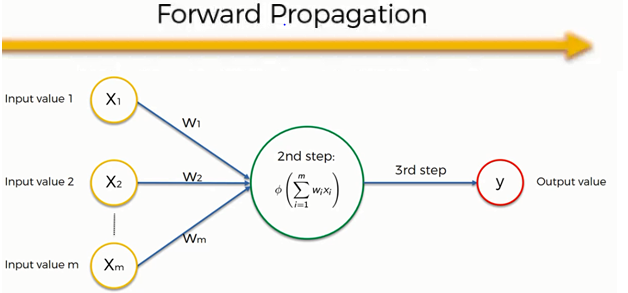

In the forward propagation step in each neurons of the second layer the linear combination (weighted sum of weights and inputs) is taken along with the bias term out and then activation function is applied. And the result is given as input to the next layer. Provided that for each neuron weights can be different. The weighted sum is denoted by z, after applying activation function, the result is denoted by a. Below is showing a 2 layer neural net.

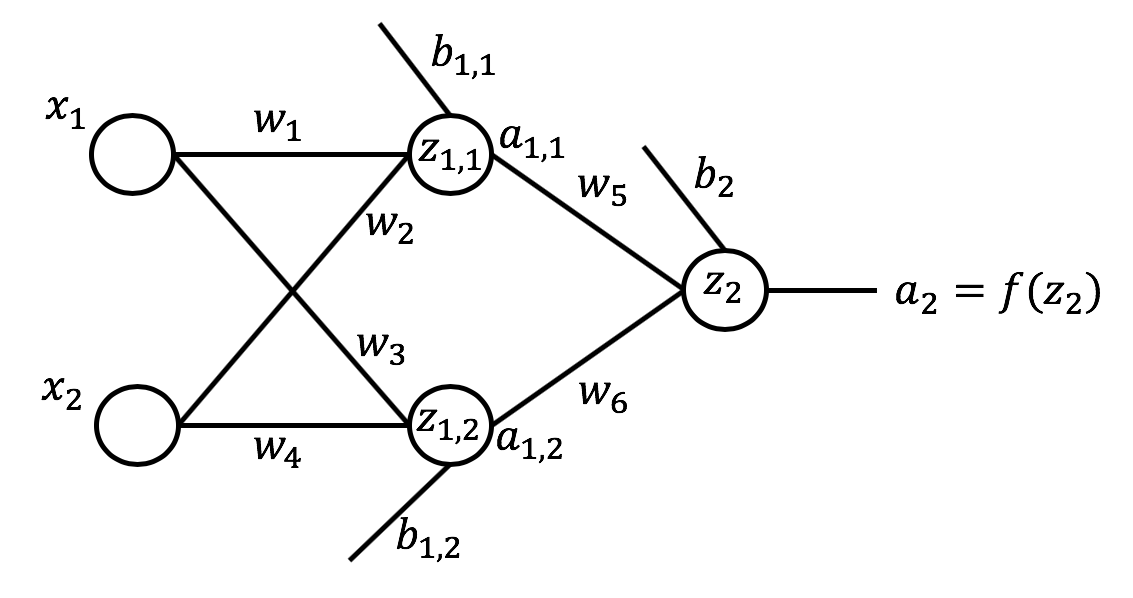

Let's Demonstrate how it's working. Let's start by randomly initializing the weights and the biases in the network. We have 6 weights and 3 biases, one for each node in the hidden layer as well as for each node in the output layer.

**Demonstration for the above network**

Let's start by randomly initializing the weights and the biases in the network. We have 6 weights and 3 biases, one for each node in the hidden layer as well as for each node in the output layer.

In [1]:
import numpy as np # import Numpy library to generate 

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

In [2]:
print("weights")
print("--------")
print(weights, end='\n\n')
print("biases")
print("-------")
print(biases)

weights
--------
[0.78 0.66 0.56 0.71 0.04 0.07]

biases
-------
[0.44 0.13 0.79]


Now that we have the weights and the biases defined for the network, let's compute the output for a given input, $x_1$ and $x_2$. Now lets find the weighted sum for $z_11$ and $z_12$. And finally convert those value to an activation function. 


In [3]:
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

x1 is 0.5 and x2 is 0.85


In [4]:
z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]
z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1] 
print("weighted sum", end="\n--------------\n")
print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(np.around(z_11, decimals=2)))
print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(np.around(z_12, decimals=2)), end='\n\n')

a_11 = 1/(1+np.exp(-z_11))
a_12 = 1/(1+np.exp(-z_12))
print("value after activation function", end='\n----------------------------\n')
print('The value after activation function at the first node in the hidden layer is {}'.format(np.around(a_11, decimals=2)))
print('The value after activation function at the second node in the hidden layer is {}'.format(np.around(a_12, decimals=2)))

weighted sum
--------------
The weighted sum of the inputs at the first node in the hidden layer is 1.39
The weighted sum of the inputs at the second node in the hidden layer is 1.01

value after activation function
----------------------------
The value after activation function at the first node in the hidden layer is 0.8
The value after activation function at the second node in the hidden layer is 0.73


In [5]:
# calculations for output node

z_21 = a_11 * weights[4] + a_12 * weights[5] + biases[2]

print('The weighted sum at the output layer is {}'.format(np.around(z_21, decimals=2)))

a_21 = 1/(1+np.exp(-z_21))

print('The output after activation function is {}'.format(np.around(a_21, decimals=2)))

The weighted sum at the output layer is 0.87
The output after activation function is 0.71


Obviously, neural networks for real problems are composed of many hidden layers and many more nodes in each layer. So, we can't continue making predictions using this very inefficient approach of computing the weighted sum at each node and the activation of each node manually. 


In order to code an automatic way of making predictions, let's generalize our network. A general network would take $n$ inputs, would have many hidden layers, each hidden layer having $m$ nodes, and would have an output layer. Although the network is showing one hidden layer, but we will code the network to have many hidden layers. Similarly, although the network shows an output layer with one node, we will code the network to have more than one node in the output layer.


<img src="http://cocl.us/general_neural_network" alt="Neural Network General" width=600px>

## Initialize a Network

Let's start by formally defining the structure of the network.

In [6]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

Now that we defined the structure of the network, let's go ahead and inititailize the weights and the biases in the network to random numbers. In order to be able to initialize the weights and the biases to random numbers, we will need to import the **Numpy** library.

In [7]:
num_nodes_previous = n # number of nodes in the previous layer

network = {} # initialize network an an empty dictionary

# loop through each layer and randomly initialize the weights and biases associated with each node
# notice how we are adding 1 to the number of hidden layers in order to include the output layer
for layer in range(num_hidden_layers + 1): 
    
    # determine name of layer
    if layer == num_hidden_layers:
        layer_name = 'output'
        num_nodes = num_nodes_output
    else:
        layer_name = 'layer_{}'.format(layer + 1)
        num_nodes = m[layer]
    
    # initialize weights and biases associated with each node in the current layer
    network[layer_name] = {}
    for node in range(num_nodes):
        node_name = 'node_{}'.format(node+1)
        network[layer_name][node_name] = {
            'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
            'bias': np.around(np.random.uniform(size=1), decimals=2),
        }
    
    num_nodes_previous = num_nodes
    
print(network) # print network

{'layer_1': {'node_1': {'weights': array([0.02, 0.32]), 'bias': array([0.38])}, 'node_2': {'weights': array([0.58, 0.03]), 'bias': array([0.71])}}, 'layer_2': {'node_1': {'weights': array([0.5 , 0.54]), 'bias': array([0.57])}, 'node_2': {'weights': array([0.11, 0.8 ]), 'bias': array([0.97])}}, 'output': {'node_1': {'weights': array([0.51, 0.06]), 'bias': array([0.59])}}}


Awesome! So now with the above code, we are able to initialize the weights and the biases pertaining to any network of any number of hidden layers and number of nodes in each layer. But let's put this code in a function so that we are able to repetitively execute all this code whenever we want to construct a neural network.


In [8]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}
    
    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):
        
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer] 
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
    
        num_nodes_previous = num_nodes

    return network # return the network

#### Use the _initialize_network_ function to create a network that:

1.  takes 5 inputs
2.  has three hidden layers
3.  has 3 nodes in the first layer, 2 nodes in the second layer, and 3 nodes in the third layer
4.  has 1 node in the output layer

Call the network **small_network**.


In [9]:
small_network = initialize_network(5,3,[3,2,3],1)
small_network

{'layer_1': {'node_1': {'bias': array([0.28]),
   'weights': array([0.38, 0.58, 0.65, 0.86, 0.41])},
  'node_2': {'bias': array([0.56]),
   'weights': array([0.6 , 0.78, 0.42, 0.44, 0.18])},
  'node_3': {'bias': array([0.19]),
   'weights': array([0.29, 0.08, 0.57, 0.6 , 0.24])}},
 'layer_2': {'node_1': {'bias': array([0.81]),
   'weights': array([0.3 , 0.21, 0.09])},
  'node_2': {'bias': array([0.74]), 'weights': array([0.23, 0.62, 0.53])}},
 'layer_3': {'node_1': {'bias': array([0.5]), 'weights': array([0.32, 0.28])},
  'node_2': {'bias': array([0.05]), 'weights': array([0.65, 0.21])},
  'node_3': {'bias': array([0.]), 'weights': array([0.78, 0.46])}},
 'output': {'node_1': {'bias': array([0.09]),
   'weights': array([0.29, 0.82, 0.55])}}}

The weighted sum at each node is computed as the dot product of the inputs and the weights plus the bias. So let's create a function called _compute_weighted_sum_ that does just that.

In [10]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

Let's generate 5 inputs that we can feed to **small_network**.


In [11]:
from random import seed
import numpy as np

np.random.seed(12)
inputs = np.around(np.random.uniform(size=5), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


#### Use the _compute_weighted_sum_ function to compute the weighted sum at the first node in the first hidden layer.


In [12]:
node_weights = small_network['layer_1']['node_1']['weights']
node_bias = small_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))

The weighted sum at the first node in the hidden layer is 1.3951


## Compute Node Activation

Recall that the output of each node is simply a non-linear tranformation of the weighted sum. We use activation functions for this mapping. Let's use the sigmoid function as the activation function here. So let's define a function that takes a weighted sum as input and returns the non-linear transformation of the input using the sigmoid function.


In [13]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

In [14]:
node_output  = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))
print('The output of the first node in the hidden layer is {}'.format(np.around(node_output[0], decimals=4)))

The output of the first node in the hidden layer is 0.8014


## Forward Propagation

The final piece of building a neural network that can perform predictions is to put everything together. So let's create a function that applies the _compute_weighted_sum_ and _node_activation_ functions to each node in the network and propagates the data all the way to the output layer and outputs a prediction for each node in the output layer.

The way we are going to accomplish this is through the following procedure:

1.  Start with the input layer as the input to the first hidden layer.
2.  Compute the weighted sum at the nodes of the current layer.
3.  Compute the output of the nodes of the current layer.
4.  Set the output of the current layer to be the input to the next layer.
5.  Move to the next layer in the network.
6.  Repeat steps 2 - 4 until we compute the output of the output layer.

In [15]:
def forward_propagate(network, inputs):
    
    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer
    
    for layer in network:
        
        layer_data = network[layer]
        
        layer_outputs = [] 
        for layer_node in layer_data:
        
            node_data = layer_data[layer_node]
        
            # compute the weighted sum and the output of each node at the same time 
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))
            
        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))
    
        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

#### Use the _forward_propagate_ function to compute the prediction of our small network


In [16]:
predictions = forward_propagate(small_network, inputs)
print('The predicted value by the network for the given input is {}'.format(np.around(predictions[0], decimals=4)))

The outputs of the nodes in hidden layer number 1 is [0.8014, 0.828, 0.6816]
The outputs of the nodes in hidden layer number 2 is [0.7834, 0.858]
The outputs of the nodes in hidden layer number 3 is [0.7293, 0.6769, 0.7322]
The predicted value by the network for the given input is 0.7789


So we built the code to define a neural network. We can specify the number of inputs that a neural network can take, the number of hidden layers as well as the number of nodes in each hidden layer, and the number of nodes in the output layer.
